In [80]:
from pandas_datareader import data as wb
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from datetime import date
import datetime
from scipy.stats import norm
import math

In [81]:
end_date = str(date.today() - datetime.timedelta(days=1))
ini_date = date(2017,1,1)
idx = pd.date_range(ini_date, end_date)
print(ini_date,'-',end_date)

2017-01-01 - 2021-11-07


Bitcoin é uma criptomoeda descentralizada, sendo um dinheiro eletrônico para transações ponto a ponto. Bitcoin é considerada a primeira moeda digital mundial descentralizada, constituindo um sistema econômico alternativo, e responsável pelo ressurgimento do sistema bancário livre.

O Bitcoin permite transações financeiras sem intermediários, mas verificadas por todos usuários (nodos) da rede, que são gravadas em um banco de dados distribuídos, chamado de blockchain, uma rede descentralizada, isto é, uma estrutura sem uma entidade administradora central, o que torna inviável qualquer autoridade financeira ou governamental manipular a emissão e o valor da criptomoeda ou induzir a inflação com a produção de mais dinheiro. No entanto, grandes movimentos especulativos de oferta e demanda influenciam na oscilação de seu valor no mercado de câmbio, sendo definido livremente durante as 24 horas do dia.

No âmbito financeiro e contabilístico internacional, semelhante ao ouro, o Bitcoin pode ser enquadrado em alguns termos: ativo especulativo (bem material), dinheiro commodity (mercadoria), unidade de conta (bem de troca) - por ser empregado como meio de troca e por possuir uma escassez relativa além de cotação própri.

Ethereum é uma plataforma descentralizada capaz de executar contratos inteligentes e aplicações descentralizadas usando a tecnologia blockchain: Operações que são feitas automaticamente quando certas condições são cumpridas sem qualquer possibilidade de censura, fraude ou interferência de terceiros, isso porque o contrato é imutável.

Além disso, ela é usada nas operações de sua própria moeda, o Ether, e também de outros ativos que usam este sistema. O Ether foi criado para ser um ativo para recompensar os desenvolvedores que usam a plataforma Ethereum para seus projetos. Mesmo assim, o Ethereum é uma das três moedas digitais mais negociadas do mundo.

A Binance é uma bolsa global de criptomoedas que fornece uma plataforma para a negociação de mais de 100 moedas criptográficas. Desde o início de 2018, a Binance é considerada a maior exchange de criptomoedas do mundo em termos de volume de negociação.

A Binance Coin é uma criptomoeda que é emitida através da mineração e, assim como o Bitcoin, ela tem a sua emissão limitada, podendo, nesse caso, chegar a um máximo de 200 milhões de unidades. No entanto, a Binance já anunciou que irá gradualmente eliminar 50% dessa quantidade por meio da sua política de queima de moedas, eventualmente reduzindo a sua disponibilidade para 100 milhões de unidades

Binance Coin foi criada especialmente para ser usada dentro da plataforma da exchange, com a vantagem de permitir que o usuário tenha descontos nas taxas. Porém, com o tempo, ela passou a ser aceita por algumas outras empresas que, apesar de não serem muitas, já contribuem para engrandecer o seu valor. Usos que vão além da plataforma incluem trading (troca dessa criptomoeda por outra), pagamentos, investimentos e até mesmo reserva de hotéis em alguns sites estrangeiros.

Cardano é uma plataforma de computação distribuída que executa o blockchain para a criptomoeda ADA. O projeto tem como objetivo executar contratos inteligentes, aplicativos descentralizados, cadeias laterais, computação multipartidária, e metadados.

As promessas desta criptomoeda incluem interoperabilidade com outras redes, alta capacidade de transações, e facilidade para movimentar criptoativos e aplicações na rede, reduzindo seu custo operacional e capacidade dos validadores.

Em primeiro lugar, é preciso entender que Cardano ainda está em fase inicial de implementação. Os smart contracts habilitados atualmente permitem apenas a criação de criptoativos simples, incluindo os tokens não-fungíveis (NFT).

Cardano utiliza menos recursos para executar as aplicações descentralizadas, o que torna as transações mais baratas.
A rede já nasce preparada de forma nativa para interoperabilidade com outras blockchains.
A capacidade teórica de processamento é maior que sua concorrente Ethereum.

S&P500 - é um índice de capitalização ponderada de 500 ações. O índice foi concebido para medir o desempenho amplo da economia doméstica americana por meio das mudanças no valor agregado das 500 ações que representam as maiores indústrias. É (S&P 500) um índice ponderado de valor de mercado (valor do ativo multiplicado pelo número de ações em circulação) com o peso de cada ativo no índice proporcional ao seu preço de mercado.

O ticker do S&P 500 é ^GSPC.

Os componentes do S&P 500 são selecionados por um comitê. Ao considerar a elegibilidade de uma nova adição, o comitê avalia o mérito da empresa usando oito critérios principais: Capitalização de mercado, liquidez, domicílio, flutuação pública, classificação setorial, viabilidade financeira e período de tempo negociado publicamente e bolsa de valores.

# Extraindo dados

In [82]:
tickers = {'BTC-USD':None,
           'ETH-USD':None,
           'BNB-USD':None,
           'ADA-USD':None,
           '^GSPC':None}

for ticker in tickers.keys():
    df = wb.DataReader(ticker, data_source='yahoo', end=end_date)
    if ini_date<df.index[0]:
        ini_date=df.index[0]
    #print(df[df.index.duplicated()])
    df = df.groupby(['Date']).mean()
    tickers[ticker] = df.reindex(idx).fillna(method='ffill')

# Analise dos dados

In [83]:
tickers['BTC-USD']

,High,Low,Open,Close,Volume,Adj Close
2017-01-01,1003.080017,958.698975,963.658020,998.325012,1.477750e+08,998.325012
2017-01-02,1031.390015,996.702026,998.617004,1021.750000,2.221850e+08,1021.750000
2017-01-03,1044.079956,1021.599976,1021.599976,1043.839966,1.851680e+08,1043.839966
2017-01-04,1159.420044,1044.400024,1044.400024,1154.729980,3.449460e+08,1154.729980
2017-01-05,1191.099976,910.416992,1156.729980,1013.380005,5.101990e+08,1013.380005
...,...,...,...,...,...,...
2021-11-03,63516.937500,61184.238281,63254.335938,62970.046875,3.612473e+10,62970.046875
2021-11-04,63123.289062,60799.664062,62941.804688,61452.230469,3.261585e+10,61452.230469
2021-11-05,62541.468750,60844.609375,61460.078125,61125.675781,3.060510e+10,61125.675781
2021-11-06,61590.683594,60163.781250,61068.875000,61527.480469,2.909493e+10,61527.480469


In [84]:
tickers['ETH-USD']

,High,Low,Open,Close,Volume,Adj Close
2017-01-01,8.471230,7.982310,7.982310,8.172570,1.473170e+07,8.172570
2017-01-02,8.436330,8.054410,8.170870,8.378510,1.457960e+07,8.378510
2017-01-03,9.996800,8.317170,8.374580,9.725250,3.362520e+07,9.725250
2017-01-04,11.276400,9.559810,9.709290,11.251600,4.105120e+07,11.251600
2017-01-05,11.890900,9.402680,11.286800,10.254400,4.155740e+07,10.254400
...,...,...,...,...,...,...
2021-11-03,4664.910156,4462.976074,4589.684570,4607.193848,2.122046e+10,4607.193848
2021-11-04,4606.516113,4426.622559,4604.678711,4537.324219,1.841524e+10,4537.324219
2021-11-05,4570.895996,4447.487305,4537.423340,4486.243164,1.508600e+10,4486.243164
2021-11-06,4530.997070,4334.973633,4482.647949,4521.581055,1.442908e+10,4521.581055


In [85]:
tickers['BNB-USD']

,High,Low,Open,Close,Volume,Adj Close
2017-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-05,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2021-11-03,570.259338,538.531006,554.557373,568.578796,2.567651e+09,568.578796
2021-11-04,569.121277,544.876831,568.578125,559.737305,2.260480e+09,559.737305
2021-11-05,615.580872,555.056091,559.390503,608.648071,3.675931e+09,608.648071
2021-11-06,636.113953,596.764465,608.263489,636.113953,2.779927e+09,636.113953


In [86]:
tickers['ADA-USD']

,High,Low,Open,Close,Volume,Adj Close
2017-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-05,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2021-11-03,2.144626,1.950845,1.971404,2.063701,4.722706e+09,2.063701
2021-11-04,2.100966,1.956403,2.064559,1.984882,3.301214e+09,1.984882
2021-11-05,2.018975,1.963668,1.984745,1.986206,2.274852e+09,1.986206
2021-11-06,2.039940,1.946815,1.985306,2.006609,1.883049e+09,2.006609


In [87]:
tickers['^GSPC']

,High,Low,Open,Close,Volume,Adj Close
2017-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-03,2263.879883,2245.129883,2251.570068,2257.830078,3.770530e+09,2257.830078
2017-01-04,2272.820068,2261.600098,2261.600098,2270.750000,3.764890e+09,2270.750000
2017-01-05,2271.500000,2260.449951,2268.179932,2269.000000,3.761820e+09,2269.000000
...,...,...,...,...,...,...
2021-11-03,4663.459961,4621.189941,4630.649902,4660.569824,3.339440e+09,4660.569824
2021-11-04,4683.000000,4662.589844,4662.930176,4680.060059,3.332940e+09,4680.060059
2021-11-05,4718.500000,4681.319824,4699.259766,4697.529785,3.491150e+09,4697.529785
2021-11-06,4718.500000,4681.319824,4699.259766,4697.529785,3.491150e+09,4697.529785


In [88]:
for ticker,df in tickers.items():
    print('\n'*2,'-'*45,ticker,'-'*45,)
    print(df.describe(include='all').astype('int32'))



 --------------------------------------------- BTC-USD ---------------------------------------------
        High    Low   Open  Close      Volume  Adj Close
count   1772   1772   1772   1772        1772       1772
mean   14713  13876  14308  14342 -2147483648      14342
std    16235  15264  15773  15809 -2147483648      15809
min      823    755    775    777    60851700        777
25%     5420   5218   5302   5311 -2147483648       5311
50%     8626   8193   8398   8421 -2147483648       8421
75%    12050  11598  11862  11868 -2147483648      11868
max    66930  63610  66002  65992 -2147483648      65992


 --------------------------------------------- ETH-USD ---------------------------------------------
       High   Low  Open  Close      Volume  Adj Close
count  1772  1772  1772   1772        1772       1772
mean    715   662   690    692 -2147483648        692
std     985   911   949    953 -2147483648        953
min       8     7     7      8     4689950          8
25%     180

# Calcular taxa de retorno simples

A taxa de retorno é o ganho ou perda líquida de um investimento durante um período de tempo específico, expresso como uma porcentagem do custo inicial do investimento.

A taxa de retorno pode ser aplicada a qualquer tipo de investimento, desde imóveis a títulos, ações e obras de arte, desde que o ativo adquirido em um determinado momento produza um fluxo de caixa no futuro.

In [89]:
for ticker,df in tickers.items():
    df['simple_return'] = (df['Adj Close']/df['Adj Close'].shift(1))-1

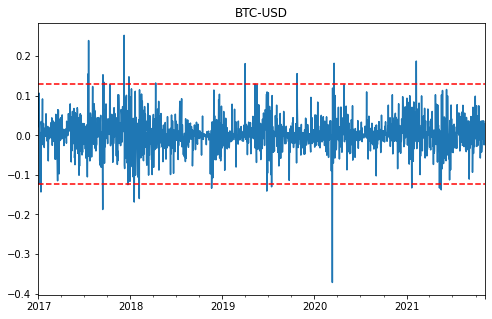

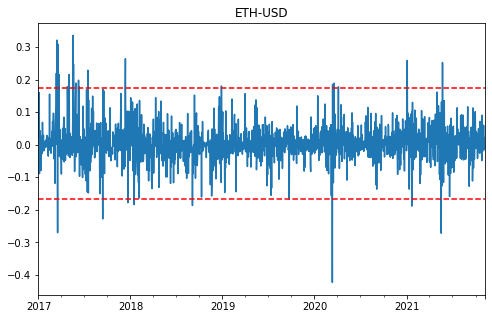

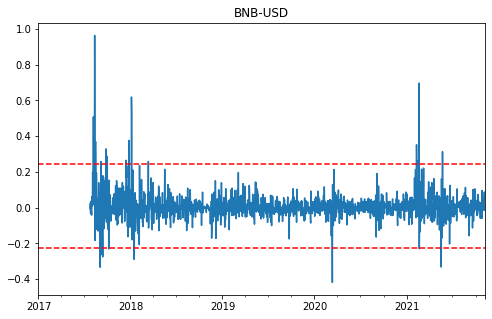

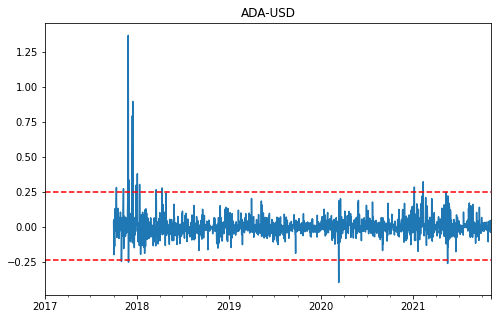

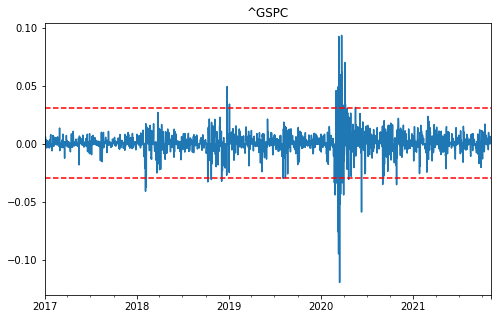

In [90]:
for ticker,df in tickers.items():
    upper_limit = df['simple_return'].mean()+(3*df['simple_return'].std())
    lower_limit = df['simple_return'].mean()-(3*df['simple_return'].std())
    df['simple_return'].plot(figsize = (8,5))
    plt.axhline(y=upper_limit, color='r', linestyle='--')
    plt.axhline(y=lower_limit, color='r', linestyle='--')
    plt.title(ticker)
    plt.show()

# Taxa Anual de Retorno Simples

Um conceito intimamente relacionado à taxa de retorno é a taxa de crescimento anual composta, ou TCAC. Essa é a taxa média anual de retorno de um investimento durante um determinado período de tempo, superior a um ano.

In [91]:
for ticker,df in tickers.items():
    if ticker == '^GSPC':
        days = 250
    else:
        days = 365
    avg = str(round(df['simple_return'].mean()*days*100,2))+'%' #365 -> criptomoedas,  250 -> Ações
    print(ticker,'-',avg)

BTC-USD - 118.3%
ETH-USD - 189.61%
BNB-USD - 304.09%
ADA-USD - 209.59%
^GSPC - 11.64%


# Calcular taxa de retorno logaritmica

A taxa de retorno simples normalmente é utilizada quando queremos lidar com vários ativos ao mesmo tempo.
Já a taxa de retorno logarítmica é preferível quando realizamos cálculos sobre um único ativo ao longo de um período de tempo.

In [92]:
for ticker,df in tickers.items():
    df['log_return'] = np.log(df['Adj Close']/df['Adj Close'].shift(1))

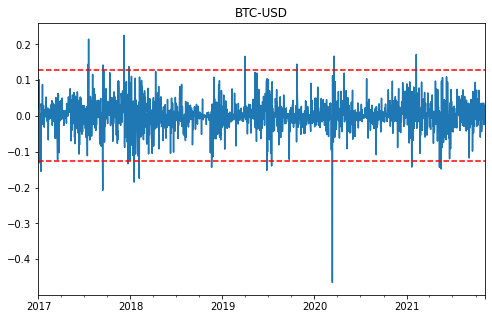

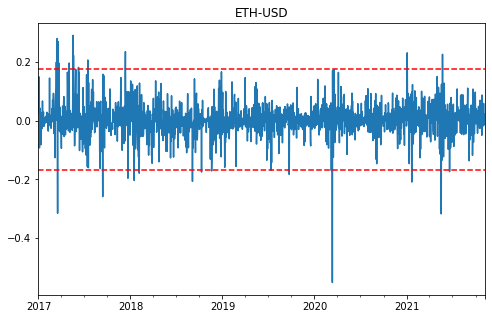

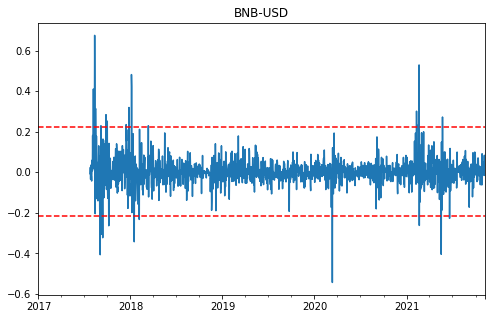

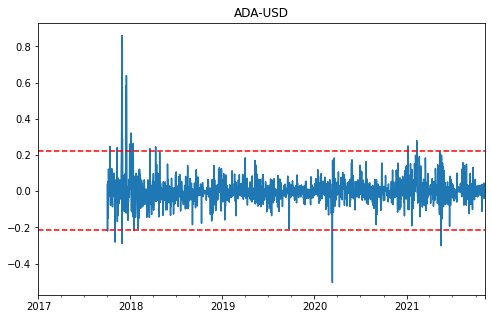

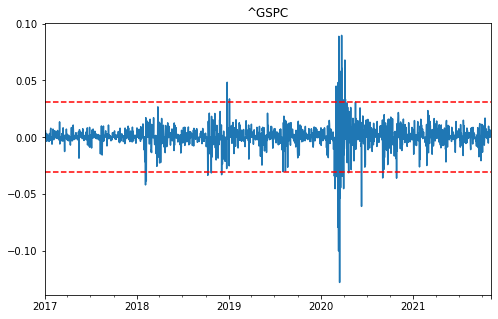

In [93]:
for ticker,df in tickers.items():
    upper_limit = df['log_return'].mean()+(3*df['log_return'].std())
    lower_limit = df['log_return'].mean()-(3*df['log_return'].std())
    df['log_return'].plot(figsize = (8,5))
    plt.axhline(y=upper_limit, color='r', linestyle='--')
    plt.axhline(y=lower_limit, color='r', linestyle='--')
    plt.title(ticker)
    plt.show()

# Taxa Anual de Retorno Logarítmico

In [94]:
for ticker,df in tickers.items():
    if ticker == '^GSPC':
        days = 250
    else:
        days = 365
    avg = str(round(df['log_return'].mean()*days*100,2))+'%' #365 -> criptomoedas,  250 -> Ações
    print(ticker,'-',avg)

BTC-USD - 85.53%
ETH-USD - 130.61%
BNB-USD - 203.19%
ADA-USD - 107.0%
^GSPC - 10.35%


# Taxa Anual de Volatilidade

A volatilidade é a principal medida de risco utilizada no mercado. A volatilidade nada mais é que o desvio padrão dos retornos dos ativos. O desvio padrão dessa série de retornos é a volatilidade diária do ativo.

In [95]:
for ticker,df in tickers.items():
    if ticker == '^GSPC':
        days = 250
    else:
        days = 365
    std = str(round((df['simple_return'].std()*days**0.5)*100,2))+'%' #365 -> criptomoedas,  250 -> Ações
    print(ticker,'-',std)#.rjust(15)

BTC-USD - 80.5%
ETH-USD - 108.58%
BNB-USD - 148.48%
ADA-USD - 155.23%
^GSPC - 16.0%


# Analise do valor de fechamento ajustado

Removendo dados anteriores em relação ao ticker mais recente e usando somente o campo de valor de fechamento ajustado

Os valores das ações são declarados em termos de preço de fechamento e preço de fechamento ajustado. O preço de fechamento é o preço bruto, que é apenas o valor em dinheiro do último preço transacionado antes do fechamento do mercado. Os fatores de preço de fechamento ajustados é qualquer coisa que possa afetar o preço das ações após o fechamento do mercado.

O preço de uma ação é tipicamente afetado pela oferta e demanda dos participantes do mercado. No entanto, algumas ações corporativas, como divisão de ações, dividendose ofertas de direitos,afetam o preço de uma ação. Os ajustes permitem que os investidores obtenham um registro preciso do desempenho das ações.

In [96]:
adj_close = pd.DataFrame()
for ticker,df in tickers.items():
    adj_close[ticker] = df.loc[df.index>=ini_date]['Adj Close']

In [97]:
adj_close

,BTC-USD,ETH-USD,BNB-USD,ADA-USD,^GSPC
2017-09-30,4403.740234,302.337006,1.526530,0.024969,2519.360107
2017-10-01,4409.319824,297.475006,1.964670,0.025932,2519.360107
2017-10-02,4317.479980,292.463013,1.820700,0.020816,2529.120117
2017-10-03,4229.359863,292.657990,1.601480,0.021931,2534.580078
2017-10-04,4328.410156,295.863007,1.678490,0.021489,2537.739990
...,...,...,...,...,...
2021-11-03,62970.046875,4607.193848,568.578796,2.063701,4660.569824
2021-11-04,61452.230469,4537.324219,559.737305,1.984882,4680.060059
2021-11-05,61125.675781,4486.243164,608.648071,1.986206,4697.529785
2021-11-06,61527.480469,4521.581055,636.113953,2.006609,4697.529785


Correlação entre ativos é uma medida estatística que demonstra a relação entre ativos. Por essa medida, podemos descobrir se, por exemplo, quando o preço de determinado ativo cai, o de outro ativo tende a subir.

In [98]:
adj_close.corr()

,BTC-USD,ETH-USD,BNB-USD,ADA-USD,^GSPC
BTC-USD,1.000000,0.915097,0.906900,0.874726,0.887988
ETH-USD,0.915097,1.000000,0.942622,0.965636,0.845808
BNB-USD,0.906900,0.942622,1.000000,0.922801,0.848295
ADA-USD,0.874726,0.965636,0.922801,1.000000,0.822633
^GSPC,0.887988,0.845808,0.848295,0.822633,1.000000


O que você deve fazer então é selecionar ativos com pouca correlação positiva ou correlação negativa. Dessa forma, você garante verdadeira diversificação na sua carteira, com ativos que não estão amarrados uns aos outros. Com ativos selecionados de diversos contextos, as chances de lucro com menor prejuízo são muito maiores.

### Analise das series temporais

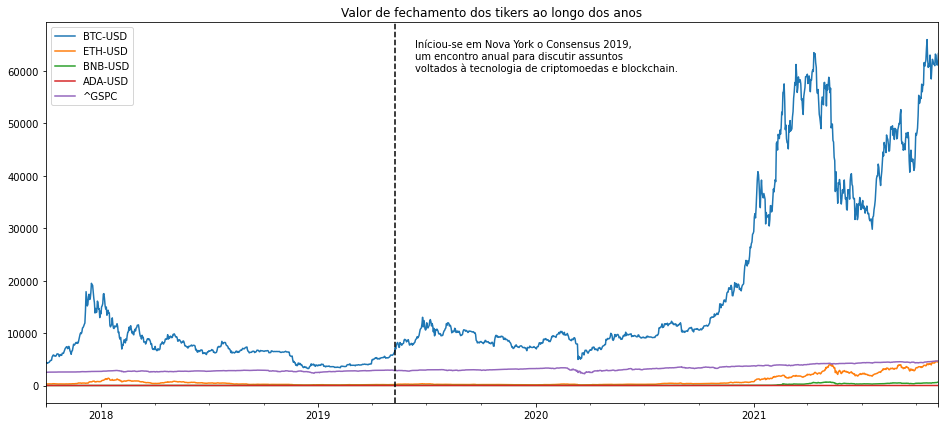

In [99]:
adj_close.plot(figsize = (16,7))
plt.axvline(x='2019-05-10', color='black', linestyle='--')
plt.text('2019-06-13',60000,'Iníciou-se em Nova York o Consensus 2019,\num encontro anual para discutir assuntos\nvoltados à tecnologia de criptomoedas e blockchain. ')#,rotation=90)
plt.title('Valor de fechamento dos tikers ao longo dos anos')
plt.show()

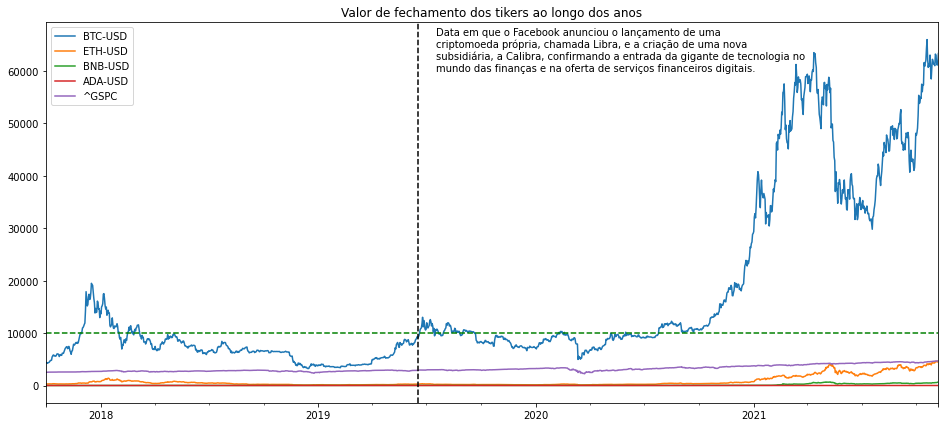

In [100]:
adj_close.plot(figsize = (16,7))
plt.axhline(y=10000, color='green', linestyle='--')
plt.axvline(x='2019-06-18', color='black', linestyle='--')
plt.text('2019-07-18',60000,'Data em que o Facebook anunciou o lançamento de uma\ncriptomoeda própria, chamada Libra, e a criação de uma nova\nsubsidiária, a Calibra, confirmando a entrada da gigante de tecnologia no\nmundo das finanças e na oferta de serviços financeiros digitais.')#,rotation=90)
plt.title('Valor de fechamento dos tikers ao longo dos anos')
plt.show()

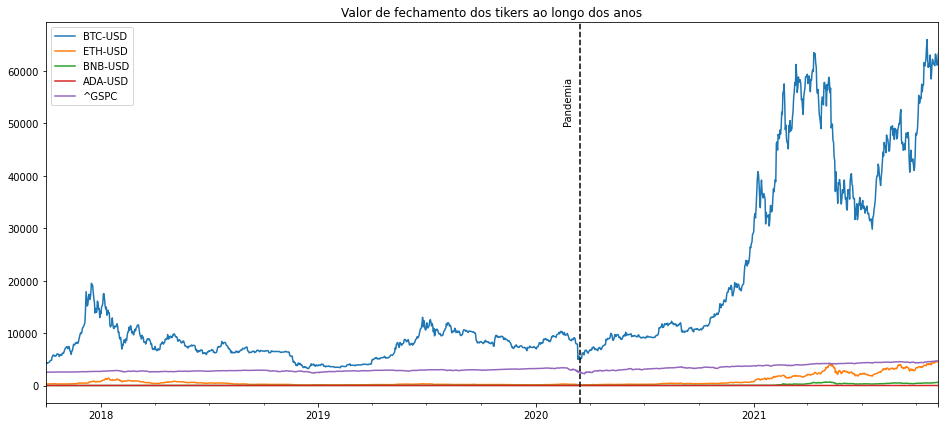

In [101]:
adj_close.plot(figsize = (16,7))
plt.axvline(x='2020-03-15', color='black', linestyle='--')
plt.text('2020-02-15',50000,'Pandemia',rotation=90)
plt.title('Valor de fechamento dos tikers ao longo dos anos')
plt.show()

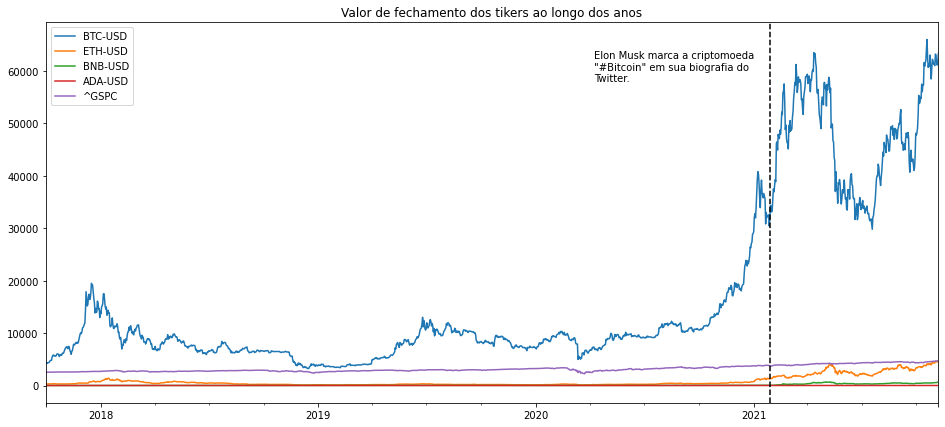

In [102]:
adj_close.plot(figsize = (16,7))
plt.axvline(x='2021-01-29', color='black', linestyle='--')
plt.text('2020-04-08',58000,'Elon Musk marca a criptomoeda\n"#Bitcoin" em sua biografia do\nTwitter.')#,rotation=90)
plt.title('Valor de fechamento dos tikers ao longo dos anos')
plt.show()

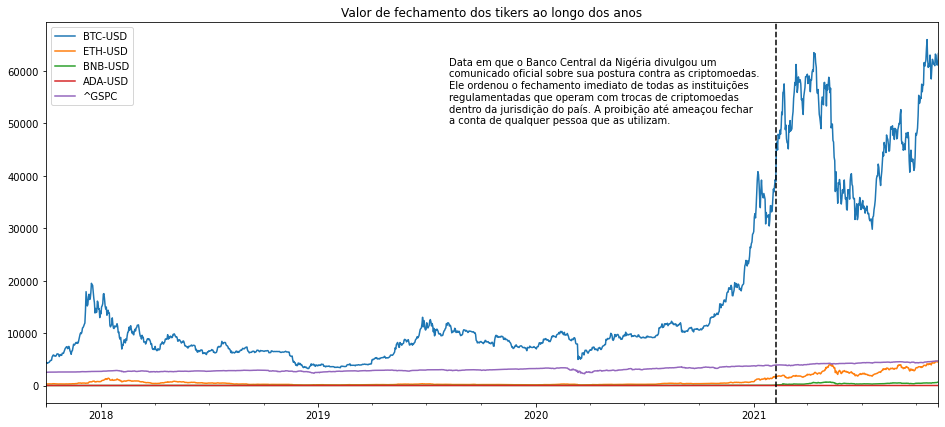

In [103]:
adj_close.plot(figsize = (16,7))
plt.axvline(x='2021-02-08', color='black', linestyle='--')
plt.text('2019-08-08',50000,'Data em que o Banco Central da Nigéria divulgou um\ncomunicado oficial sobre sua postura contra as criptomoedas.\nEle ordenou o fechamento imediato de todas as instituições\nregulamentadas que operam com trocas de criptomoedas\ndentro da jurisdição do país. A proibição até ameaçou fechar\na conta de qualquer pessoa que as utilizam.')#,rotation=90)
plt.title('Valor de fechamento dos tikers ao longo dos anos')
plt.show()

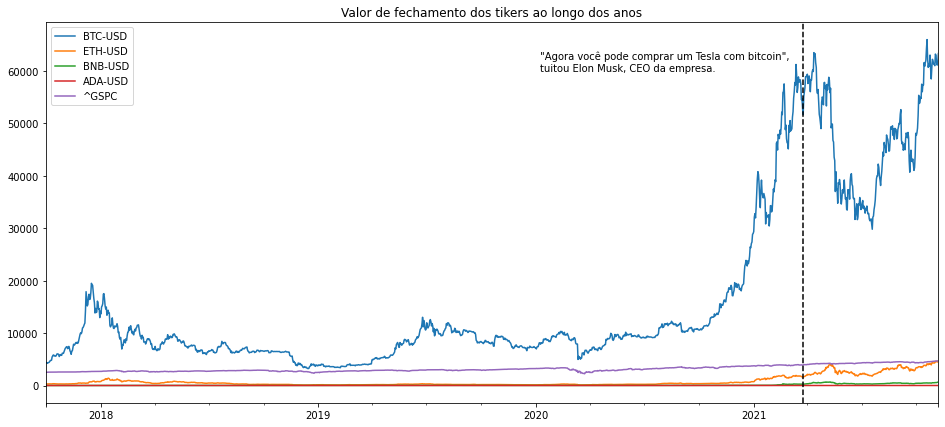

In [104]:
adj_close.plot(figsize = (16,7))
plt.axvline(x='2021-03-24', color='black', linestyle='--')
plt.text('2020-01-08',60000,'"Agora você pode comprar um Tesla com bitcoin",\ntuitou Elon Musk, CEO da empresa.')#,rotation=90)
plt.title('Valor de fechamento dos tikers ao longo dos anos')
plt.show()

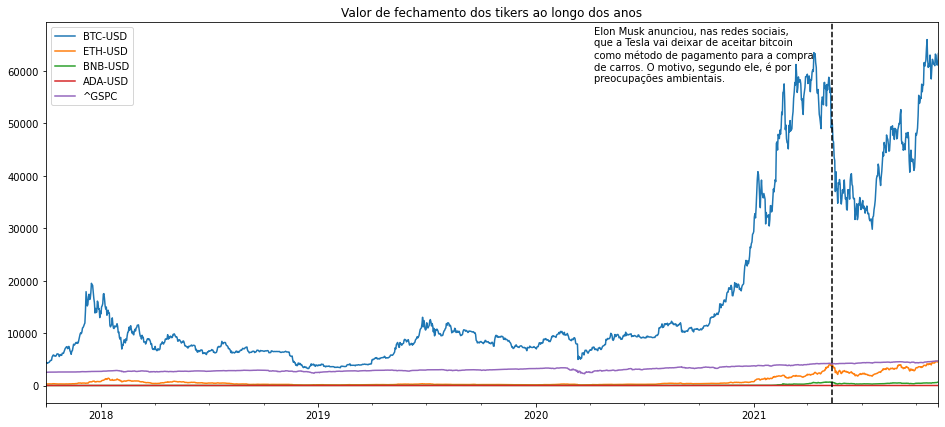

In [105]:
adj_close.plot(figsize = (16,7))
plt.axvline(x='2021-05-12', color='black', linestyle='--')
plt.text('2020-04-08',58000,'Elon Musk anunciou, nas redes sociais,\nque a Tesla vai deixar de aceitar bitcoin\ncomo método de pagamento para a compra\nde carros. O motivo, segundo ele, é por\npreocupações ambientais.')#,rotation=90)
plt.title('Valor de fechamento dos tikers ao longo dos anos')
plt.show()

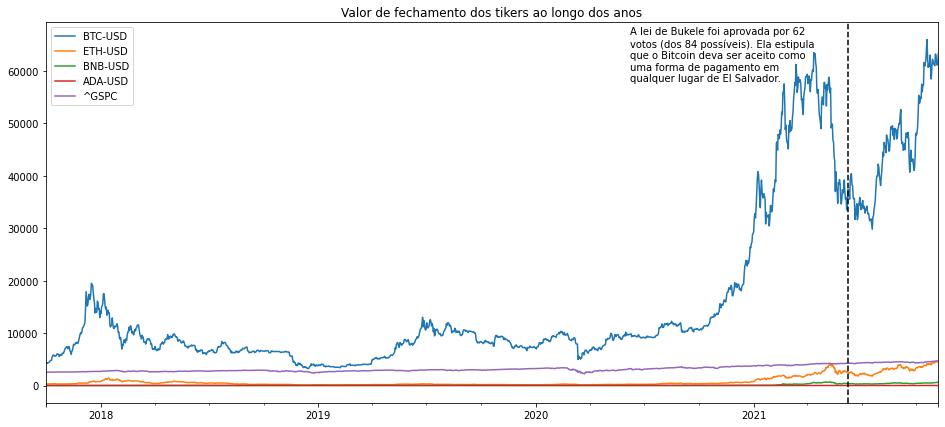

In [106]:
adj_close.plot(figsize = (16,7))
plt.axvline(x='2021-06-09', color='black', linestyle='--')
plt.text('2020-06-07',58000,'A lei de Bukele foi aprovada por 62\nvotos (dos 84 possíveis). Ela estipula\nque o Bitcoin deva ser aceito como\numa forma de pagamento em\nqualquer lugar de El Salvador.')#,rotation=90)
plt.title('Valor de fechamento dos tikers ao longo dos anos')
plt.show()

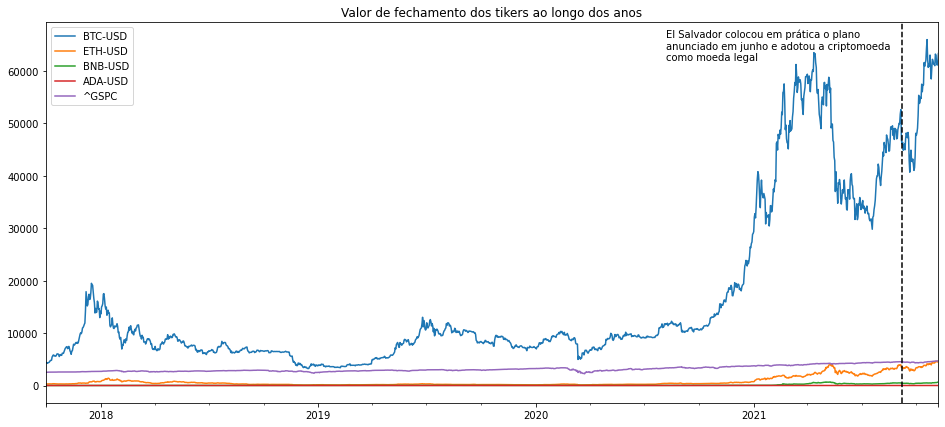

In [107]:
adj_close.plot(figsize = (16,7))
plt.axvline(x='2021-09-07', color='black', linestyle='--')
plt.text('2020-08-07',62000,'El Salvador colocou em prática o plano\nanunciado em junho e adotou a criptomoeda\ncomo moeda legal')#,rotation=90)
plt.title('Valor de fechamento dos tikers ao longo dos anos')
plt.show()

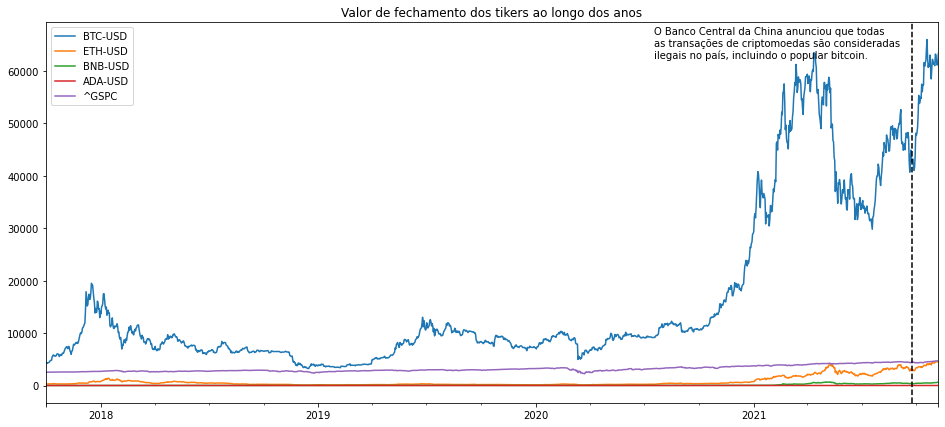

In [108]:
adj_close.plot(figsize = (16,7))
plt.axvline(x='2021-09-24', color='black', linestyle='--')
plt.text('2020-07-18',62500,'O Banco Central da China anunciou que todas\nas transações de criptomoedas são consideradas\nilegais no país, incluindo o popular bitcoin.')#,rotation=90)
plt.title('Valor de fechamento dos tikers ao longo dos anos')
plt.show()

### Analise das series temporais normalizadas

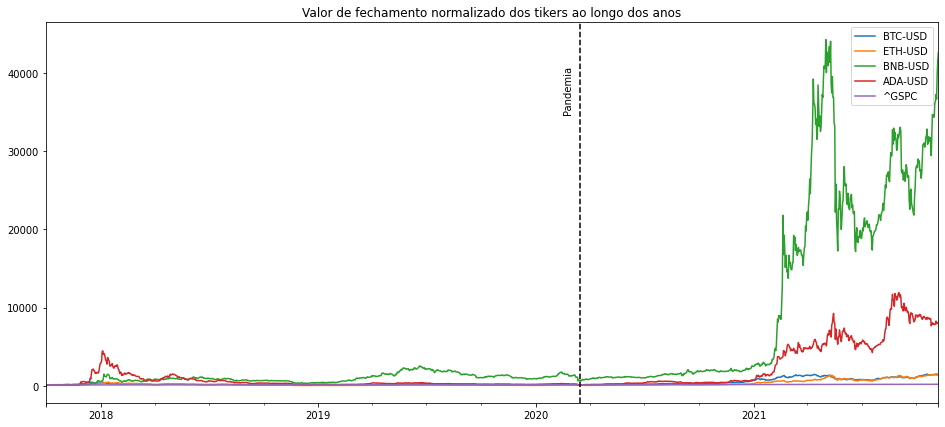

In [109]:
(adj_close / adj_close.iloc[0] * 100).plot(figsize = (16,7))
plt.axvline(x='2020-03-15', color='black', linestyle='--')
plt.text('2020-02-15',35000,'Pandemia',rotation=90)
plt.title('Valor de fechamento normalizado dos tikers ao longo dos anos')
plt.show()

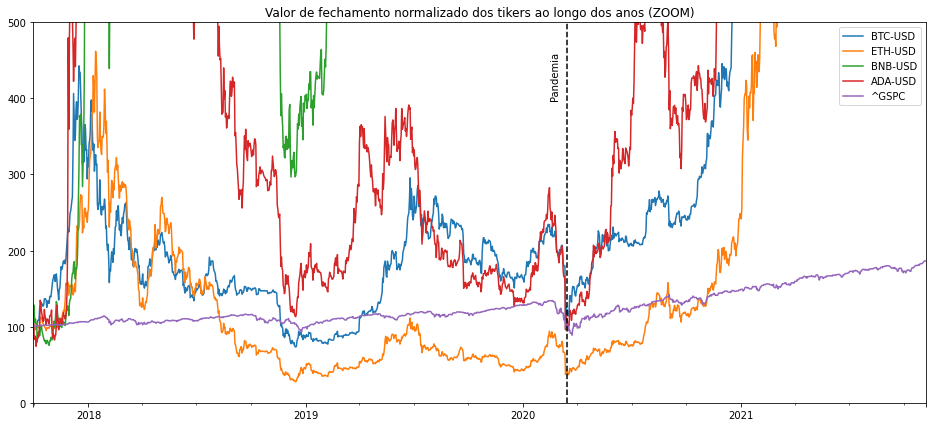

In [110]:
(adj_close / adj_close.iloc[0] * 100).plot(figsize = (16,7))
plt.axvline(x='2020-03-15', color='black', linestyle='--')
plt.text('2020-02-15',400,'Pandemia',rotation=90)
plt.ylim([0, 500])
plt.title('Valor de fechamento normalizado dos tikers ao longo dos anos (ZOOM)')
plt.show()

# Analise do valor de retorno simples

In [111]:
simple_return = pd.DataFrame()
for ticker,df in tickers.items():
    simple_return[ticker] = df.loc[df.index>ini_date]['simple_return']

In [112]:
simple_return.corr()

,BTC-USD,ETH-USD,BNB-USD,ADA-USD,^GSPC
BTC-USD,1.000000,0.738890,0.589596,0.505925,0.119113
ETH-USD,0.738890,1.000000,0.581014,0.571774,0.119609
BNB-USD,0.589596,0.581014,1.000000,0.428814,0.107174
ADA-USD,0.505925,0.571774,0.428814,1.000000,0.082448
^GSPC,0.119113,0.119609,0.107174,0.082448,1.000000


# Comparação das correlações

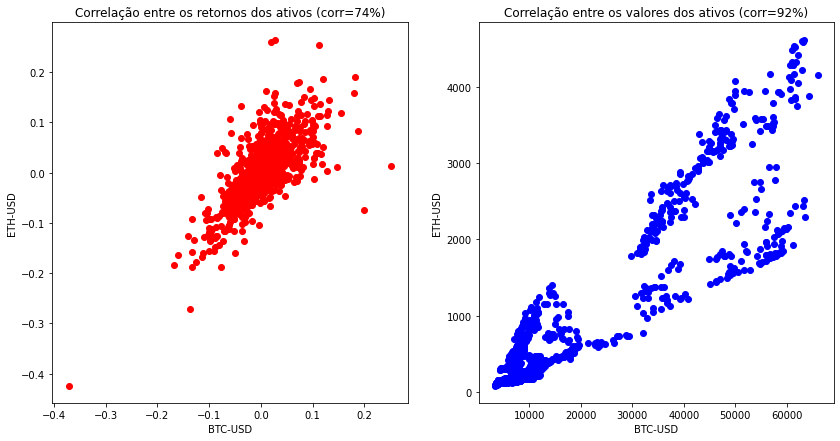

In [113]:
x = 'BTC-USD'
y = 'ETH-USD'

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))

corr_value = round(simple_return[[x,y]].corr().iloc[0][1]*100)
axes[0].scatter(x=simple_return[x], y=simple_return[y], color='r')
axes[0].set_title('Correlação entre os retornos dos ativos (corr='+str(corr_value)+'%)')
axes[0].set_xlabel(x)
axes[0].set_ylabel(y)

corr_value = round(adj_close[[x,y]].corr().iloc[0][1]*100)
axes[1].scatter(x=adj_close[x], y=adj_close[y], color='b')
axes[1].set_title('Correlação entre os valores dos ativos (corr='+str(corr_value)+'%)')
axes[1].set_xlabel(x)
axes[1].set_ylabel(y)

plt.show()

# Portifólio de investimentos

Um portifólio de investimentos, ou ma carteira de investimentos, é um grupo de ativos que pertence a um investidor, pessoa física ou pessoa jurídica. Estes ativos podem ser ações, fundos, títulos públicos, debêntures, aplicações imobiliárias, entre outros. A carteira permite a diversificação de ativos bem como de risco, levando a maior tranquilidade ao investidor e menor volatilidade do património.

A gestão de investimentos tem incorporada uma relação clara entre risco e retorno. O retorno esperado pelo investidor está relacionado com o risco que pretende correr. A diminuição de risco de uma carteira pode ser conseguida pela sua diversificação, que reduz o risco único, no entanto não consegue reduzir o risco do mercado. Assim é importante saber o efeito que cada título poderá ter na carteira.

In [114]:
days = np.array([365,365,365,365,250])

In [115]:
percentage_investment_each_ticker = np.array([0.60,0.25,0.10,0.03,0.02])

In [116]:
annual_return = simple_return.mean()*days

In [117]:
annual_portfolio_return = np.dot(annual_return,percentage_investment_each_ticker)
print('Retorno anual do portifólio: '+str(round(annual_portfolio_return*100,2))+'%')

Retorno anual do portifólio: 115.93%


Os investidores obrigatoriamente selecionam carteiras não baseados apenas no desempenho individual dos ativos, mas considerando o comportamento da carteira de forma agrupada, não bastando apenas variar, mas sendo necessária a diversificação considerando a correlação entre os ativos da carteira.

A variância da carteira depende da covariância entre os ativos (considerando seu percentual individual) tomados em pares. A covariância por sua vez decorre da relação existente entre estes ativos, desta maneira, a pouca correlação entre os ativos resulta em um risco menor para a carteira do que a média ponderada dos riscos individuais dos ativos, este risco muitas vezes atinge um valor abaixo do ativo de menor risco, porém, com retorno maior.

Bernstein (1997), fala que através deste método é possível determinar quais alterações na carteira resultariam na diminuição do risco total, maximizando o retorno esperado e minimizando a variância. O investidor pode descobrir a composição ótima da carteira de investimentos, obtendo o trade-off entre risco e retorno.

In [118]:
cov_aux = np.dot(simple_return.cov()*days, percentage_investment_each_ticker)

In [119]:
portfolio_variance = np.dot(percentage_investment_each_ticker.T, cov_aux)
print('Variância do portifólio: '+str(round(portfolio_variance*100,2))+'%')

Variância do portifólio: 62.67%


In [120]:
portfolio_volatility = (np.dot(percentage_investment_each_ticker.T, cov_aux)) ** 0.5
print('Volatilidade do portifólio: '+str(round(portfolio_volatility*100,2))+'%')

Volatilidade do portifólio: 79.17%


Existem certas situações que o riscos de mercado (ou riscos sistemático) são tão importantes que afetam toda a economia. Esse tipo de questão, portanto, é algo inerente a todos os tipos de ativos da uma carteira.

Assim, é seguro dizer que o risco de mercado é aquele do qual não dá para se proteger com diversificação. Ou seja, é um risco não diversificável. Afinal, todos os ativos de uma carteira são vulneráveis a ele.

É importante ter em mente, no entanto, que nem todos os ativos são afetados igualmente por todos os riscos sistemáticos. Por exemplo, a oscilação da inflação afeta mais os títulos de Renda Fixa do que ações da Bolsa. No entanto, de uma maneira ou de outra, todos são impactados por esse risco.

Se o risco sistemático é aquele que afeta toda a economia, então o risco não sistemático é aquele reservado somente a um ativo ou porção do mercado. Dessa forma, o risco não sistemático é aquele risco diversificável. Isso significa, portanto, que é o tipo de situação da qual é possível se proteger via diversificação.

Um exemplo simples de entender o que é risco não sistemático é pensar na nuvem de gafanhotos que se aproximou do Brasil. Como os animais se alimentam de plantações de milho e cana-de-açúcar, a situação poderia afetar empresas ligadas a essas commodities.

In [121]:
diversifiable_risk = portfolio_variance
non_diversifiable_risk = 0

for i,ticker in enumerate(simple_return.columns):
    ticker_risk = (percentage_investment_each_ticker[i] ** 2) * (simple_return[ticker].var()*days[i])
    diversifiable_risk -= ticker_risk
    non_diversifiable_risk += ticker_risk
    
print('Risco diversificável do portifólio: '+str(round(diversifiable_risk*100,2))+'%')
print('Risco nçao diversificável do portifólio: '+str(round(non_diversifiable_risk*100,2))+'%')

Risco diversificável do portifólio: 32.2%
Risco nçao diversificável do portifólio: 30.47%


In [ ]:
fronteira eficiente

O modelo de Markowitz é também conhecido como Teoria Moderna do Portfólio. Trata-se de uma teoria pela qual investidores adversos ao risco podem construir seu portfólio para obter mais retorno a partir de um determinado nível de risco de mercado.

Esse modelo permite encontrar o maior nível de retorno para um certo nível de risco; ou, ao contrário, o menor nível de risco para um certo nível de retorno.

A base desse modelo é a construção de “fronteiras eficientes” de portfólios otimizados, considerando que risco e retorno devem ser avaliados em conjunto dentro da carteira de investimento.

Essas fronteiras eficientes são as combinações possíveis de ativos, apresentadas como pontos em um gráfico no qual o eixo X corresponde ao risco e o eixo Y corresponde ao retorno.

Os pontos são conectados, formando uma curva hiperbólica ascendente, que representa a fronteira mais eficiente. Dessa forma, o investidor consegue identificar com boa precisão qual é a combinação de ativos capaz de produzir o resultado mais eficiente.

In [182]:
def generate_portfolio(df,columns):
    expected_portfolio_return_list = []
    expected_portfolio_volatility_list = []
    expected_portfolio_weights_list = []
    
    for i in range(2000):
        weights = np.random.random(len(df[columns].columns))
        weights /= np.sum(weights)
        if ticker == '^GSPC':
            days = 250
        else:
            days = 365
        expected_portfolio_return_list += [np.sum(weights * df[columns].mean())*days]
        expected_portfolio_volatility_list += [np.sqrt(np.dot(weights.T, np.dot(df[columns].cov()*days, weights)))]
        expected_portfolio_weights_list += [{c:round(w,2) for c,w in zip(columns,weights)}]
    
    portfolios = pd.DataFrame({'Return': np.array(expected_portfolio_return_list),
                               'Volatility': np.array(expected_portfolio_volatility_list),
                               'Weights':np.array(expected_portfolio_weights_list)})
    return portfolios

Text(0, 0.5, 'Retorno esperado')

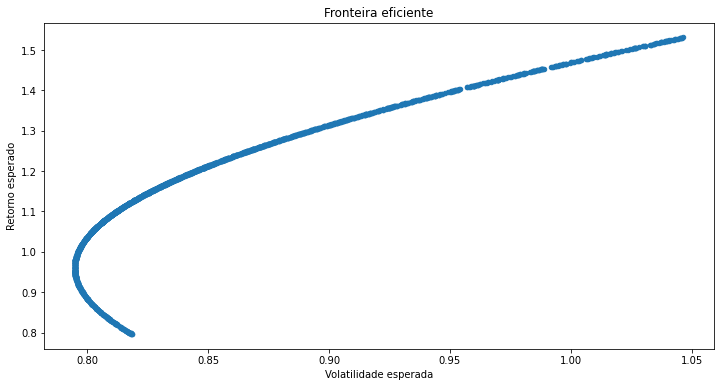

In [256]:
portfolios = generate_portfolio(simple_return,['ETH-USD','BNB-USD'])
portfolios.plot(x='Volatility',y='Return',kind='scatter',figsize=(12,6))

plt.title('Fronteira eficiente')
plt.xlabel('Volatilidade esperada')
plt.ylabel('Retorno esperado')

Text(0, 0.5, 'Retorno esperado')

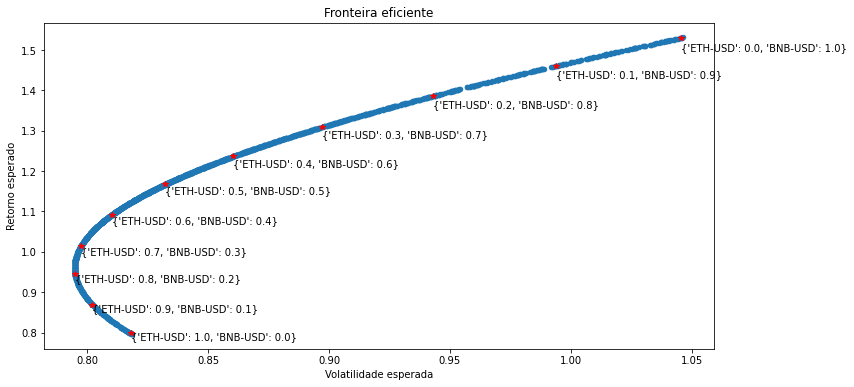

In [255]:
portfolios = generate_portfolio(simple_return,['ETH-USD','BNB-USD'])
portfolios.plot(x='Volatility',y='Return',kind='scatter',figsize=(12,6))

for value in range(0,101,10):
    for i in portfolios.index:
        weight_dict = portfolios['Weights'][i]
        if weight_dict['ETH-USD'] == (value/100) and weight_dict['BNB-USD'] == ((100-value)/100):
            plt.plot(portfolios['Volatility'][i], portfolios['Return'][i], 'r*')
            plt.text(portfolios['Volatility'][i],portfolios['Return'][i]*0.98,str(portfolios['Weights'][i]))
            break

plt.title('Fronteira eficiente')
plt.xlabel('Volatilidade esperada')
plt.ylabel('Retorno esperado')

Text(0, 0.5, 'Retorno esperado')

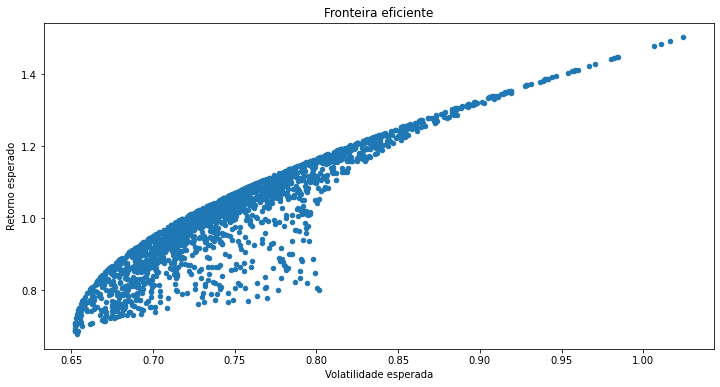

In [184]:
portfolios = generate_portfolio(simple_return,['ETH-USD','BNB-USD','BTC-USD'])
portfolios.plot(x='Volatility',y='Return',kind='scatter',figsize=(12,6))

plt.title('Fronteira eficiente')
plt.xlabel('Volatilidade esperada')
plt.ylabel('Retorno esperado')

Text(0, 0.5, 'Retorno esperado')

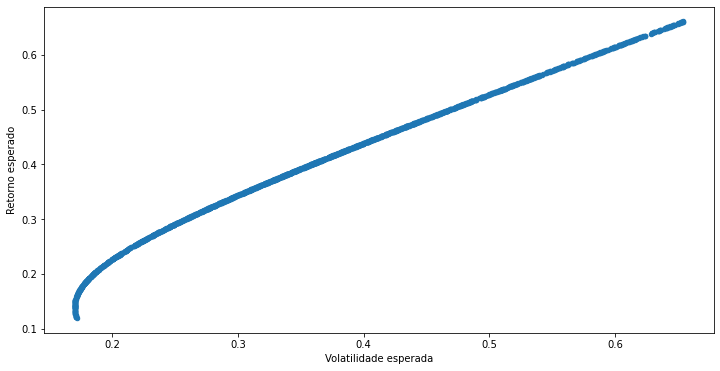

In [159]:
portfolios = generate_portfolio(simple_return,['^GSPC','BTC-USD'])
portfolios.plot(x='Volatility',y='Return',kind='scatter',figsize=(12,6))

plt.title('Fronteira eficiente')
plt.xlabel('Volatilidade esperada')
plt.ylabel('Retorno esperado')

linha de mercado de capitais

A linha de mercado de capitais (CML)é a linha tangente traçada do ponto do ativo livre de risco para a região viável para ativos de risco. O ponto de tangência M representa a carteira de mercado, assim chamada, uma vez que todos os investidores racionais (critério de variância mínima) devem manter seus ativos de risco nas mesmas proporções que seus pesos na carteira de mercado.

A figura abaixo representa graficamente a equação da CML, com as diferentes combinações possíveis entre ativos sem risco e ativos de risco, seus riscos (eixo X) e as respectivas rentabilidades associadas a cada nível de risco (eixo Y). Atente-se ao fato de que a CML considera o desvio-padrão como medida de risco, tratando-se, dessa forma, do 

A finalidade básica da CML é a construção de uma linha de carteiras eficientes que considera a possibilidade de combinação entre ativos livres de risco e ativos de risco.

Na figura acima, a CML (linha pontilhada) representa as diferentes combinações possíveis entre ativos de risco e ativos livres de risco. Partindo do intercepto, em que 100% da carteira é formada por ativos livres de risco, e avançando em direção ao ponto M, temos a seguinte situação: quanto mais à direita, maior será o percentual de ativos de risco e menor o percentual de ativos livres de risco.

No ponto médio entre o intercepto e o ponto M, há uma carteira formada 50% por ativos de risco e 50% por ativos livres de risco; no ponto M, situa-se a própria carteira de mercado, 100% formada por ativos de risco.

Observe que a CML tangencia a fronteira eficiente e possui pontos de mesmo risco e maior retorno comparados aos pontos da fronteira. Isso significa que combinações de risco e retorno mais atrativas que aquelas expressas pela fronteira eficiente são possíveis quando consideramos a possibilidade de investimento em ativos sem risco, o que não ocorre quando nos limitamos ao mercado de ações. Dessa maneira, abaixo do ponto M sempre é possível combinar ativos livres de risco com ativos de risco de forma a superar a rentabilidade das carteiras da fronteira eficiente sem aumentar a exposição ao risco. Ou, de forma equivalente, podemos dizer que é possível reduzir o risco mantendo a rentabilidade das carteiras da fronteira eficiente.

Resta discutirmos a CML além do ponto M. Acima deste ponto, a CML representa a possibilidade de alavancagem, ou seja, empréstimos. Isso indica que, acima da carteira de mercado M, existem carteiras com maior rentabilidade se comparadas às carteiras da fronteira eficiente de risco equivalente. Essas carteiras são possíveis quando se tem acesso a empréstimos à taxa Rf. Se este for o caso, o investidor que busca maior exposição ao risco em troca de maiores lucros, em vez de simplesmente montar uma carteira com ativos mais arriscados que aqueles da carteira de mercado M, pode alcançar ainda mais rentabilidade se expondo ao risco com alavancagem para aumentar a sua posição na carteira M.

rf: : este ponto representa a taxa de retorno livre de risco e se encontra no intercepto da CML, em que o eixo X, que representa o risco, vale zero. Perceba que a CML supera a fronteira eficiente, pois, a risco zero, não há carteira da fronteira eficiente que seja capaz de superar a rentabilidade da carteira da CML, que, nesse ponto, seria a carteira 100% formada por ativos livres de risco. Representa, portanto, a taxa mínima exigida para qualquer investimento.

m: : ponto em que a CML representa uma carteira 100% formada por ativos de risco. Nesse ponto, a CML tangencia a fronteira eficiente, sendo, portanto, a carteira de máxima diversificação (ou carteira de mercado).

https://proeducacional.com/packages/uploads/2020/11/img_5fa1f37229e58.png

In [220]:
def capital_market_line(portifolios, risk_free):
    b = risk_free
    a = portfolios['Return'].max()
    points = []
    for _ in range(500):
        x_values = []
        y_values =[]
        for i in range(int(portfolios['Volatility'].min()*1000),int(portfolios['Volatility'].max()*1000)):
            x = i/1000
            x_values += [x]
            y = (a*x)+b
            y_values += [y]
            for ind in portfolios.index:
                x_port = portfolios['Volatility'][ind]
                y_port = portfolios['Return'][ind]
                distance = math.dist((x,y),(x_port,y_port))
                if distance<0.001:
                    points += [(distance,ind)]
        if points:
            break
        a = a-(portfolios['Return'].max()*(1/500))
    return x_values, y_values, sorted(points)[0][1]

A taxa Selic representa os juros básicos da economia brasileira. Os movimentos da Selic influenciam todas as taxas de juros praticadas no país – sejam as que um banco cobra ao conceder um empréstimo, sejam as que um investidor recebe ao realizar uma aplicação financeira.

A Selic tem esse nome por conta do Sistema Especial de Liquidação e de Custódia, um sistema administrado pelo Banco Central em que são negociados títulos públicos federais. A taxa média registrada nas operações feitas diariamente nesse sistema equivale à taxa Selic.

Mas de que tipo de operações estamos falando? São empréstimos de curtíssimo prazo – com vencimento em apenas um dia – realizados entre as instituições financeiras, que têm títulos públicos federais dados como garantia.

A taxa média desses negócios, apurada todos os dias, é chamada de Selic “efetiva”. O nome diz tudo: é o percentual de juros que efetivamente está sendo praticado nesse mercado. Mas existe ainda a Selic “meta” – e é provavelmente sobre essa que você costuma ouvir falar com mais frequência no seu dia a dia.

Text(0, 0.5, 'Retorno esperado')

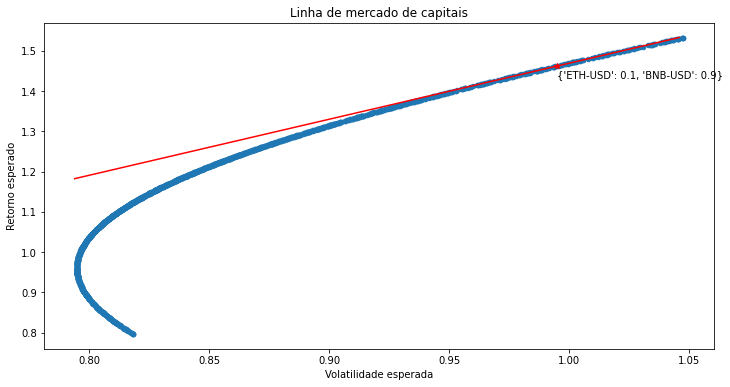

In [221]:
portfolios = generate_portfolio(simple_return,['ETH-USD','BNB-USD'])
portfolios.plot(x='Volatility',y='Return',kind='scatter',figsize=(12,6))

x_values, y_values, point = capital_market_line(portfolios,0.0775) #selic

plt.plot(portfolios['Volatility'][point], portfolios['Return'][point], 'r*')
plt.text(portfolios['Volatility'][point],portfolios['Return'][point]*0.98,str(portfolios['Weights'][point]))

plt.plot(x_values, y_values, 'r')

plt.title('Linha de mercado de capitais')

plt.xlabel('Volatilidade esperada')
plt.ylabel('Retorno esperado')

Text(0, 0.5, 'Retorno esperado')

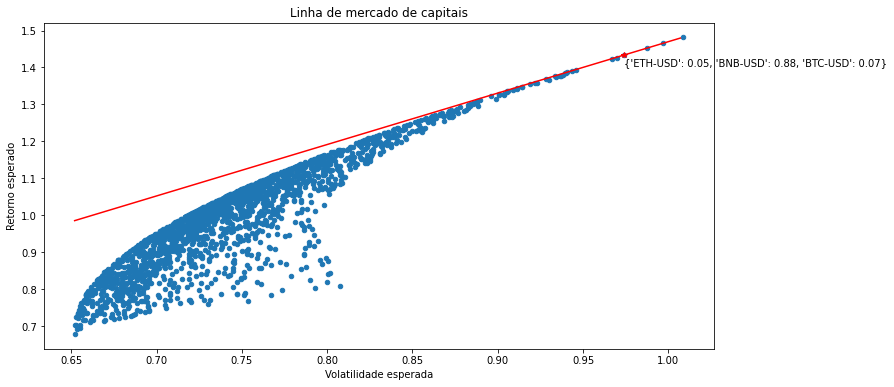

In [224]:
portfolios = generate_portfolio(simple_return,['ETH-USD','BNB-USD','BTC-USD'])
portfolios.plot(x='Volatility',y='Return',kind='scatter',figsize=(12,6))

x_values, y_values, point = capital_market_line(portfolios,0.0775) #selic

plt.plot(portfolios['Volatility'][point], portfolios['Return'][point], 'r*')
plt.text(portfolios['Volatility'][point],portfolios['Return'][point]*0.98,str(portfolios['Weights'][point]))

plt.plot(x_values, y_values, 'r')

plt.title('Linha de mercado de capitais')

plt.xlabel('Volatilidade esperada')
plt.ylabel('Retorno esperado')

Text(0, 0.5, 'Retorno esperado')

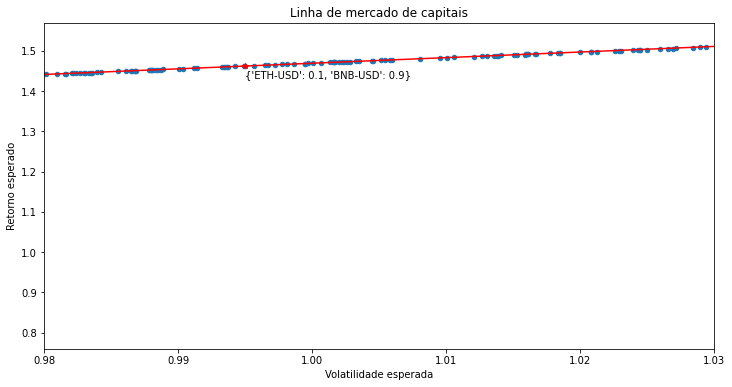

In [223]:
portfolios.plot(x='Volatility',y='Return',kind='scatter',figsize=(12,6))

plt.plot(portfolios['Volatility'][point], portfolios['Return'][point], 'r*')
plt.text(portfolios['Volatility'][point],portfolios['Return'][point]*0.98,str(portfolios['Weights'][point]))

plt.plot(x_values, y_values, 'r')

plt.xlim([0.98,
          1.03])

plt.title('Linha de mercado de capitais')

plt.xlabel('Volatilidade esperada')
plt.ylabel('Retorno esperado')

In [79]:
portfolios = generate_portfolio(simple_return,['ETH-USD','BNB-USD'])
portfolios.plot(x='Volatility',y='Return',kind='scatter',figsize=(12,6))


#b = portfolios['Return'].min()

b = 0.0775 #selic
teste = False
volatility_list = list(portfolios['Volatility'].round(3))
return_list = list(portfolios['Return'].round(3))
a = portfolios['Return'].max()
for aux_value in range(1000):
    x_values = []
    y_values =[]
    for i in range(750,int(portfolios['Volatility'].max()*1000)):
        x = i/1000
        x_values += [x]
        y = (a*x)+b
        y_values += [y]
        try:
            id_volatility_list = volatility_list.index(round(x,3))
            id_return_list = return_list.index(round(y,3))
            if math.isclose(id_volatility_list, id_return_list, abs_tol = 1) and math.isclose(volatility_list[id_volatility_list], return_list[id_return_list], rel_tol=0.20): #volatility_list.index(round(x)) == return_list.index(round(y)):
                teste = True
                print(x)
        except:
            pass
    if teste:
        break
    a = a-(portfolios['Return'].max()*0.001)
            

plt.plot(x_values, y_values)
plt.title('')

margem = (portfolios['Volatility'].mean()*0.01)
#plt.xlim([portfolios['Volatility'].min()-margem,
#          portfolios['Volatility'].max()+margem])

plt.xlabel('Volatilidade esperada')
plt.ylabel('Retorno esperado')

NameError: name 'generate_portfolio' is not defined

Text(0, 0.5, 'Retorno esperado')

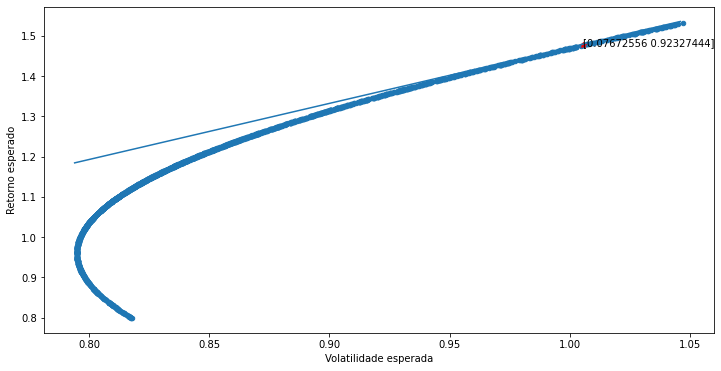

In [160]:
portfolios = generate_portfolio(simple_return,['ETH-USD','BNB-USD'])
portfolios.plot(x='Volatility',y='Return',kind='scatter',figsize=(12,6))


#b = portfolios['Return'].min()

b = 0.0775 #selic
teste = False
a = portfolios['Return'].max()
point = 0
for aux_value in range(100):
    x_values = []
    y_values =[]
    for i in range(int(portfolios['Volatility'].min()*1000),int(portfolios['Volatility'].max()*1000)):
        x = i/1000
        x_values += [x]
        y = (a*x)+b
        y_values += [y]
        for ind in portfolios.index:
            x_port = round(portfolios['Volatility'][ind],3)
            y_port = round(portfolios['Return'][ind],3)
            if math.dist((round(x,3),round(y,3)),(x_port,y_port))<0.001:
                teste = True
                point = ind
    if teste:
        break
    a = a-(portfolios['Return'].max()*0.01)
            
plt.plot(portfolios['Volatility'][point], portfolios['Return'][point], 'r*')
plt.text(portfolios['Volatility'][point],portfolios['Return'][point],str(portfolios['Weights'][point]))
plt.plot(x_values, y_values, 'r')
plt.title('')

margem = (portfolios['Volatility'].mean()*0.01)
#plt.xlim([portfolios['Volatility'].min()-margem,
#          portfolios['Volatility'].max()+margem])

plt.xlabel('Volatilidade esperada')
plt.ylabel('Retorno esperado')

In [212]:
point

(5.755843596762487e-05, 715)

Text(0, 0.5, 'Retorno esperado')

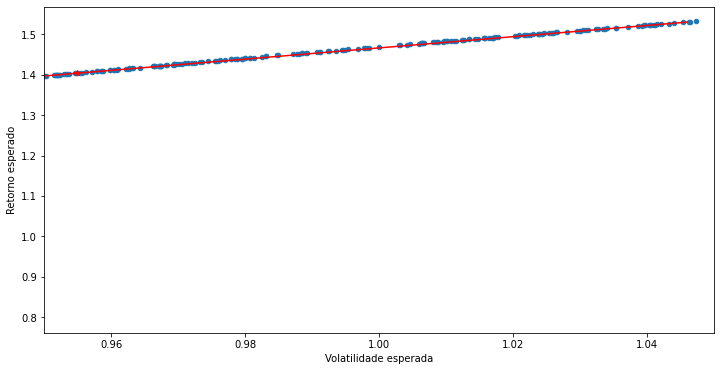

In [219]:
portfolios.plot(x='Volatility',y='Return',kind='scatter',figsize=(12,6))
plt.plot(portfolios['Volatility'][point[1]], portfolios['Return'][point[1]], 'r*')
#plt.text(portfolios['Volatility'][point[1]],portfolios['Return'][point[1]]*0.98,str(portfolios['Weights'][point[1]]))
plt.plot(x_values, y_values, 'r')
plt.title('')

margem = (portfolios['Volatility'].mean()*0.01)
plt.xlim([0.95,
          1.05])

plt.xlabel('Volatilidade esperada')
plt.ylabel('Retorno esperado')

In [126]:
4

4

In [27]:
test = result[['ETH-USD','BNB-USD']].copy()
test

,ETH-USD,BNB-USD
2017-09-30,0.002888,0.173344
2017-10-01,-0.016212,0.252327
2017-10-02,-0.016992,-0.076103
2017-10-03,0.000666,-0.128293
2017-10-04,0.010892,0.046966
...,...,...
2021-10-30,-0.008725,-0.006760
2021-10-31,0.000000,0.000000
2021-11-01,0.008488,0.050012
2021-11-02,0.058420,0.005773


In [28]:
weights = np.random.random(len(test.columns))
weights /= np.sum(weights)
print(weights)
print(sum(weights))

[0.1702226 0.8297774]
1.0


In [29]:
expected_portfolio_return = np.sum(weights * test.mean())*365
expected_portfolio_return

1.3468859018012607

In [30]:
expected_portfolio_variance = np.dot(weights.T, np.dot(test.cov()*365, weights))
expected_portfolio_variance

1.2847825782257316

In [31]:
expected_portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(test.cov()*365, weights)))
expected_portfolio_volatility

1.133482500185041

In [34]:
financial_analysis = {}
financial_analysis['Beta'] = {}

covariance_GSPC = (result.cov() * 365).loc['^GSPC']
for i,v in zip(covariance_GSPC.index,covariance_GSPC.values):
    if i!='^GSPC':
        beta = v / (result['^GSPC'].var() * 250)
        print('Beta',i,'=',beta)
        financial_analysis['Beta'].update({i:beta})

Beta BTC-USD = 0.7479517870159489
Beta ETH-USD = 0.9576516549752595
Beta BNB-USD = 1.0675018350577108
Beta ADA-USD = 0.9730856486703551


In [35]:
financial_analysis['CAPM'] = {}
for i,v in financial_analysis['Beta'].items():
    CAPM = (2.5/100)+v*(5/100)
    print('CAPM',i,'=',CAPM)
    financial_analysis['CAPM'].update({i:CAPM})

CAPM BTC-USD = 0.06239758935079745
CAPM ETH-USD = 0.07288258274876297
CAPM BNB-USD = 0.07837509175288554
CAPM ADA-USD = 0.07365428243351776


In [36]:
financial_analysis['Sharpe'] = {}
for i,v in financial_analysis['CAPM'].items():
    sharpe = (v-(2.5/100)) / (result[i].std() * 365 ** 0.5)
    print('Sharpe',i,'=',sharpe)
    financial_analysis['Sharpe'].update({i:sharpe})

Sharpe BTC-USD = 0.04677715552559806
Sharpe ETH-USD = 0.04760269009380896
Sharpe BNB-USD = 0.04351489593026724
Sharpe ADA-USD = 0.03497087702572945


In [37]:
result = pd.DataFrame()
result['BTC-USD'] = tickers['BTC-USD']['Adj Close']

In [38]:
log_returns = np.log(1+result.pct_change())

In [39]:
drift = log_returns.mean() - (0.5 * log_returns.var())
drift

BTC-USD    0.001442
dtype: float64

In [40]:
stdev = log_returns.std()
stdev

BTC-USD    0.0425
dtype: float64

In [41]:
norm.ppf(0.95)

1.6448536269514722

In [42]:
x = np.random.rand(10,2)
x

array([[0.25224711, 0.38632956],
       [0.36807964, 0.67345967],
       [0.67260442, 0.0549777 ],
       [0.81261555, 0.23081081],
       [0.35043594, 0.73152727],
       [0.79085821, 0.8721543 ],
       [0.40721828, 0.53248436],
       [0.04680473, 0.28203071],
       [0.56117958, 0.24506397],
       [0.14171778, 0.93198891]])

In [43]:
Z = norm.ppf(x)
Z

array([[-0.66743515, -0.28889841],
       [-0.33694379,  0.44948663],
       [ 0.44711621, -1.59839362],
       [ 0.88757592, -0.73617923],
       [-0.38414378,  0.61743861],
       [ 0.80940264,  1.13663381],
       [-0.23470648,  0.08151642],
       [-1.67665757, -0.57681947],
       [ 0.15396054, -0.69010536],
       [-1.07263355,  1.49076888]])

In [44]:
t_intervals = 1000
iterations = 10

daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals,iterations)))
daily_returns

array([[1.03075302, 1.0257498 , 1.02950233, ..., 1.04733179, 1.01615794,
        1.05221123],
       [1.06111433, 0.95356259, 1.01965832, ..., 1.04307382, 0.96451984,
        0.99426506],
       [1.01831253, 1.00595283, 0.9350665 , ..., 1.046861  , 1.00373245,
        0.96760314],
       ...,
       [0.98756731, 1.03759688, 1.0286654 , ..., 1.01972185, 1.05896608,
        0.97855801],
       [0.98188992, 0.92940872, 1.02659779, ..., 0.98941097, 0.98870431,
        0.97685426],
       [1.01212241, 0.94223546, 1.05234963, ..., 1.03866881, 1.02027945,
        0.95442872]])

In [45]:
S0 = result.iloc[-1]
S0

BTC-USD    62970.046875
Name: 2021-11-03 00:00:00, dtype: float64

In [46]:
price_list = np.zeros_like(daily_returns)
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [47]:
price_list[0] = S0
price_list

array([[62970.046875, 62970.046875, 62970.046875, ..., 62970.046875,
        62970.046875, 62970.046875],
       [    0.      ,     0.      ,     0.      , ...,     0.      ,
            0.      ,     0.      ],
       [    0.      ,     0.      ,     0.      , ...,     0.      ,
            0.      ,     0.      ],
       ...,
       [    0.      ,     0.      ,     0.      , ...,     0.      ,
            0.      ,     0.      ],
       [    0.      ,     0.      ,     0.      , ...,     0.      ,
            0.      ,     0.      ],
       [    0.      ,     0.      ,     0.      , ...,     0.      ,
            0.      ,     0.      ]])

In [48]:
for t in range(1,t_intervals):
    price_list[t] = price_list[t-1] * daily_returns[t]

In [49]:
price_list

array([[  62970.046875  ,   62970.046875  ,   62970.046875  , ...,
          62970.046875  ,   62970.046875  ,   62970.046875  ],
       [  66818.41917542,   60045.88120668,   64207.93217048, ...,
          65682.40747033,   60735.85929166,   62608.91770322],
       [  68042.03328386,   60403.32400358,   60038.68614687, ...,
          68760.35088315,   60962.5525623 ,   60580.5852555 ],
       ...,
       [ 225966.460062  ,  126277.95388763, 1052407.97484127, ...,
          25945.08161159,   24887.26657698,  309536.71621797],
       [ 221874.1896355 ,  117363.83183178, 1080399.70134434, ...,
          25670.34836217,   24606.14782026,  302372.26016796],
       [ 224563.84003385,  110584.36364908, 1136958.22757899, ...,
          26662.9901685 ,   25105.14693889,  288592.76927783]])

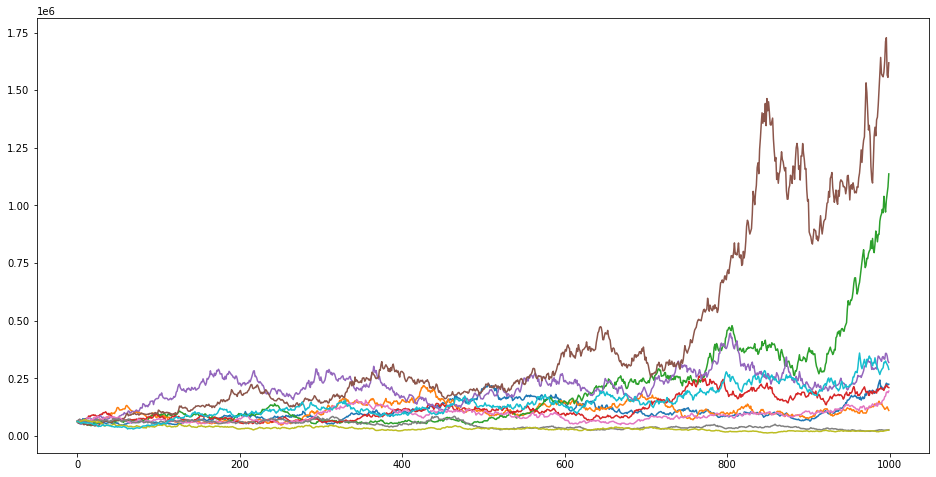

In [50]:
plt.figure(figsize=(16,8))
plt.plot(price_list);

In [51]:
r = 0.025

In [52]:
stdev = (log_returns.std()*365 **0.5).values
stdev

array([0.8119617])

In [53]:
T = 1.0
t_intervals = 365
delta_t = T/t_intervals

iterations = 10000

In [54]:
Z = np.random.standard_normal((t_intervals+1,iterations))
S = np.zeros_like(Z)
S0 = result.iloc[-1]
S[0] = S0

In [55]:
for t in range(1, t_intervals+1):
    S[t] = S[t-1] * np.exp((r - 0.5 * stdev ** 2) * delta_t + stdev * delta_t ** 0.5 * Z[t])

In [56]:
S

array([[ 62970.046875  ,  62970.046875  ,  62970.046875  , ...,
         62970.046875  ,  62970.046875  ,  62970.046875  ],
       [ 69313.44585932,  66450.82542506,  59859.73439088, ...,
         60488.43732942,  59784.62085978,  59151.28935743],
       [ 67883.18333407,  63502.99293596,  58672.02444813, ...,
         57172.74129864,  56582.29872241,  56695.65222361],
       ...,
       [ 12666.90398504,  80578.34687051,  21021.34924003, ...,
        127544.70136937,  73035.97413117,  82834.63013819],
       [ 12039.67938632,  75156.24937094,  21186.15373786, ...,
        134408.08361577,  73625.3602477 ,  83688.62918679],
       [ 12526.72470765,  77282.14605561,  21001.2241636 , ...,
        139128.96550012,  68113.4259109 ,  79337.573179  ]])

In [57]:
S.shape

(366, 10000)

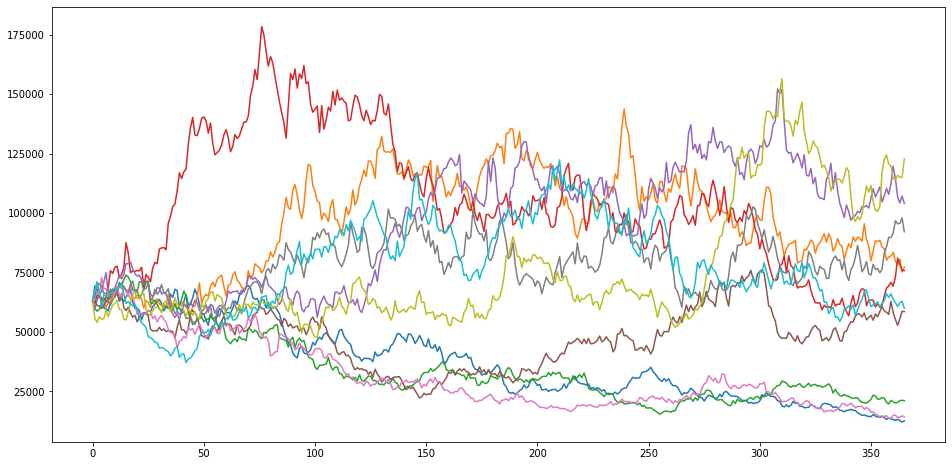

In [58]:
plt.figure(figsize=(16,8))
plt.plot(S[:, :10]);

In [59]:
p = np.maximum(S[-1] - 110,0)

In [60]:
C = np.exp(-r * T) * np.sum(p) / itarions
C

NameError: name 'itarions' is not defined